# Lab 2: Dealing with different image types and file formats and performing basic image manipulations

## <font color = orange> Part 1: Dealing with different image types and file formats </font>

Image files can be of different formats. Some of the popular ones include <b> BMP (8-bit, 24-bit,32-bit), PNG, JPG (JPEG), GIF, PPM, PNM, and TIFF.</b>

### Converting from one type format to another:

In [1]:
from PIL import Image

#read orginal image 
img = Image.open("images/dog.png")
print(img.mode)
print(type(img))

#convert image to RGB
img = img.convert('RGB')
print(img.mode)

# Save the jpg image
img.save("images/dog.jpg")

RGBA
<class 'PIL.PngImagePlugin.PngImageFile'>
RGB


### Image types (modes):
- <font color = red> Single channel images </font>—each pixel is represented by a single value:
    - <b> Binary images </b> (each pixel is represented by a single 0-1 bit)
    - <b> Gray-level images </b> (each pixel can be represented with 8-bits and can have values typically in the range of 0-255) 
    <br> <br> 
- <font color = red> Multi-channel images </font> — each pixel is represented by a tuple of values:
    - <b> RGB images </b> — each pixel is represented by three tuple (r, g, b) values, representing red, green, and blue channel color  values for every pixel.
    - <b> HSV images </b> — each pixel is represented by three tuple (h, s, v) values, representing hue, saturation, value
    - <b> Four-channel images </b>; for example, RGBA images—each pixel is represented by three-tuple (r, g, b, α) values, the last channel representing the transparency.




### Converting from one image (type) mode into another

<class 'numpy.ndarray'>


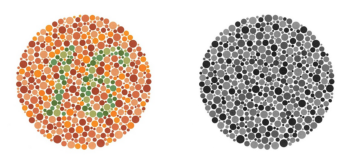

In [2]:
from skimage.io import imread 
from skimage import color
import matplotlib.pyplot as plt

# read image 
im = imread("images/Ishihara.jpg")
print(type(im))

# convert rgb to gray
im_g = color.rgb2gray(im)

#plot RGB and gray images
plt.subplot(1,2,1)
plt.imshow(im)
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(im_g, cmap='gray')
plt.axis('off')
plt.show()

# Note:  we can lose some information while converting into grayscale for some colored images. 

### Converting from one color space into another

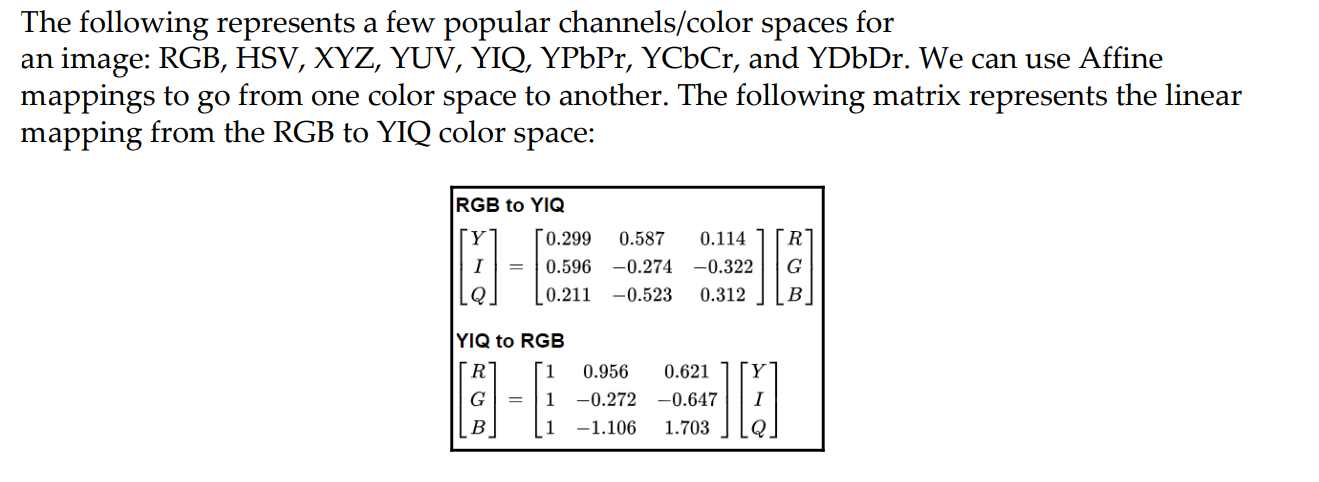

* Y: Luminance or brightness information, which represents the overall intensity of the image.

* I: In-phase chrominance, which represents the color information along the horizontal axis of the color wheel.

* Q: Quadrature-phase chrominance, which represents the color information along the vertical axis of the color wheel.

<class 'numpy.ndarray'>
(316, 404, 3)


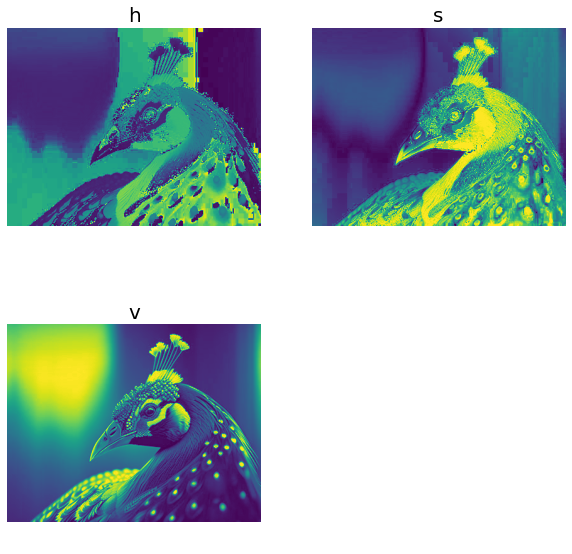

In [3]:
from skimage.io import imread 
from skimage import color
import matplotlib.pyplot as plt

#read image
im = imread("images/peacock.jpeg")

#convert image to hsv
im_hsv = color.rgb2hsv(im)

print(type(im_hsv))
print(im.shape)

plt.figure(figsize=(10,10))

plt.subplot(221), plt.imshow(im_hsv[:,:,0]), plt.title('h', size=20),
plt.axis('off')

plt.subplot(222), plt.imshow(im_hsv[:,:,1]), plt.title('s', size=20),
plt.axis('off')

plt.subplot(223), plt.imshow(im_hsv[:,:,2]), plt.title('v', size=20),
plt.axis('off')

plt.subplot(224), plt.axis('off')
plt.show()

<class 'numpy.ndarray'>
(316, 404, 3)


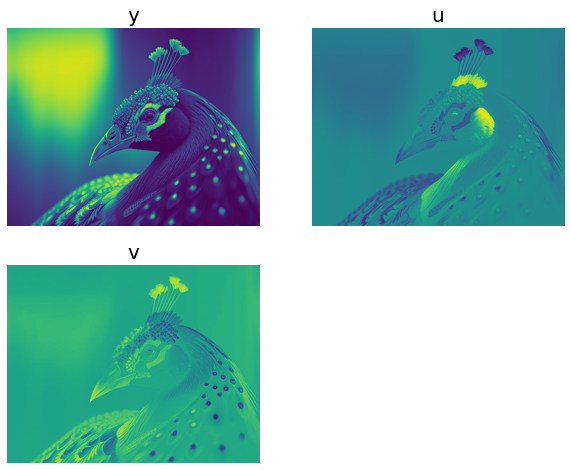

In [4]:
from skimage.io import imread 
from skimage import color
import matplotlib.pyplot as plt

#read image
im = imread("images/peacock.jpeg")

#convert image to yuv
im_yuv = color.rgb2yuv(im)

print(type(im_hsv))
print(im.shape)

plt.figure(figsize=(10,8))

plt.subplot(221), plt.imshow(im_yuv[:,:,0]), plt.title('y', size=20),
plt.axis('off')

plt.subplot(222), plt.imshow(im_yuv[:,:,1]), plt.title('u', size=20),
plt.axis('off')

plt.subplot(223), plt.imshow(im_yuv[:,:,2]), plt.title('v', size=20),
plt.axis('off')

plt.subplot(224), plt.axis('off')
plt.show()

### Converting image data structures

In [5]:
# The following code block shows how to convert from the PIL Image object into numpy ndarray (to be consumed by scikit-image):
from PIL import Image
from skimage.io import imshow
import numpy as np

# read image into an Image object with PIL
im = Image.open('images/peacock.jpeg') 
print(type(im))


# create a numpy ndarray from the Image object
im = np.array(im) 
print(type(im))

<class 'PIL.JpegImagePlugin.JpegImageFile'>
<class 'numpy.ndarray'>


In [6]:
# The following code block shows how to convert from numpy ndarray into a PIL Image object.
from skimage.io import imread

# read image into numpy ndarray with skimage
im = imread('images/peacock.jpeg') 
print(type(im))

# create a PIL Image object from the numpy ndarray
im = Image.fromarray(im) 
print(type(im))

# display the image with PIL Image.show() method
# im.show() 

<class 'numpy.ndarray'>
<class 'PIL.Image.Image'>


## <font color = orange> Part 2: Basic image manipulations </font>

(220, 220, 3)
<class 'numpy.ndarray'>


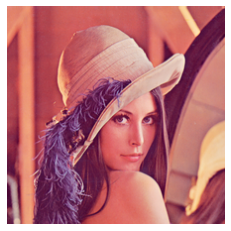

In [7]:
from skimage.io import imread

lena = imread("images/Lenna.png") # read the image from disk as a numpy ndarray
print(lena.shape)
print(type(lena))

plt.imshow(lena)
plt.axis('off')
plt.show()

(220, 1) (1, 220)


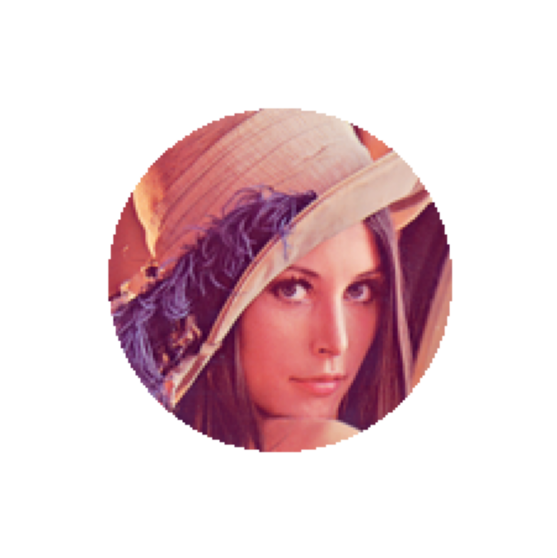

In [8]:
lx, ly, _ = lena.shape

# ogrid function to create two arrays,  X and Y representing the rows and columns of the image, respectively
X, Y = np.ogrid[0:lx, 0:ly]

print(X.shape, Y.shape)

# creates a boolean mask by checking whether the distance between each pixel in the image and the center of the image 
# is greater than the radius of a circle with half the diameter of the image. 
# Pixels that are outside the circle are set to True in the mask
mask = (X - lx / 2) ** 2 + (Y - ly / 2) ** 2 > lx * ly / 10
lena[mask,:] = 255 # masks

plt.figure(figsize=(10,10))
plt.imshow(lena)
plt.axis('off')
plt.show()

#### Image manipulations with PIL

In [9]:
from PIL import Image
im = Image.open("images/peacock.jpeg") 
print(im.width, im.height, im.mode, im.format)

404 316 RGB JPEG


#### Cropping an image

In [10]:
im_c = im.crop((175,75,320,200)) # crop the rectangle given by (left, top, right, bottom) from the image
im_c.save('images/peacock_cropped.png')
# im_c.show()

#### Resizing an image

In [11]:
im = Image.open("images/Lenna.png")
print(im.width, im.height)
# im.show()

220 220


In [12]:
im_large = im.resize((im.width*5, im.height*5), Image.BILINEAR) # bi-linear interpolation
print(im_large.width, im_large.height)
# im_large.show()
im_large.save('images/peaccok_large.jpg')

1100 1100


In [13]:
im_small = im.resize((im.width//5, im.height//5), Image.ANTIALIAS)
print(im_small.width, im_small.height)
im_small.save('images/peaccok_small.jpg')

44 44


#### Negating an image

In [14]:
im = Image.open("images/peacock.jpeg")
im_t = im.point(lambda x: 255 - x)
im_t.save("images/peacock_t.jpeg")
#im_t.show()

#### Converting an image into grayscale

In [15]:
im_g = im.convert('L') 
# im_g.show()

<b>Log transformation</b>
The log transformation can be used to effectively compress an image that has a dynamic
range of pixel values. The following code uses the point transformation for logarithmic
transformation. As can be seen, the range of pixel values is narrowed, the brighter pixels
from the input image have become darker, and the darker pixels have become brighter,
thereby shrinking the range of values of the pixels:

In [16]:
img_log = im_g.point(lambda x: 255*np.log(1+x/255))
img_log.save("images/peacock_log.jpeg")
# img_log.show()

<b>Power-law transformation</b>: This transformation is used as γ correction for an image. The next line of code shows how to
use the point() function for a power-law transformation, where γ = 0.6:

In [17]:
img_pl = im_g.point(lambda x: 255*(x/255)**0.6)
img_pl.save("images/peacock_pl.jpeg")

### Some geometric transformations

#### recflecting an image

We can use the transpose() function to reflect an image with regard to the horizontal or vertical axis:

In [18]:
# reflect about the vertical axis
im_ref = im.transpose(Image.FLIP_LEFT_RIGHT)
im_ref.save('images\img_ref.jpeg')

#### Rotating an image

In [19]:
# rotate the image by 180 degrees
im_180 = im.rotate(180)
im_180.save('images\img_rot.jpeg')

#### Shearing

In [20]:
# Apply the shear transformation to the image
im_sheared = im.transform(im.size, Image.AFFINE, data=(1,-0.5,0,0,1,0))

# Show the original and sheared images side by side
new_size = (im.width*2, im.height)
new_im = Image.new('RGB', new_size)
new_im.paste(im, (0, 0))
new_im.paste(im_sheared, (im.width, 0))
# new_im.show()

# Save the sheared image to file
im_sheared.save('images/peacock_sheared.jpeg')


The data argument in the transform() function is a 6-tuple
(a, b, c, d, e, f), which contains the first two rows from an Affine transform matrix. For each
pixel (x, y) in the output image, the new value is taken from a position (a x + b y + c, d x + e y+ f) in the input image, which is rounded to nearest pixel. The transform() function can
be used to scale, translate, rotate, and shear the original image

#### Perspective transformation

In [21]:
params = [1, 0.1, 0, -0.1, 0.5, 0, -0.005, -0.001]
im_presp_trans = im.transform((im.width//3, im.height), Image.PERSPECTIVE, params, Image.BICUBIC)
im_presp_trans.save('images/im_presp_trans.png')

#### Changing pixel values of an image

#### Adding salt and pepper noise to an image

In [22]:
# choose 5000 random locations inside image
im1 = im.copy() # keep the original image, create a copy
n = 5000
x, y = np.random.randint(0, im.width, n), np.random.randint(0, im.height, n)
for (x,y) in zip(x,y):
 im1.putpixel((x, y), ((0,0,0) if np.random.rand() < 0.5 else (255,255,255))) # salt-and-pepper noise
im1.save('images\peacock_salt_pepper.jpeg')

#### Drawing on an image

In [23]:
from PIL import ImageDraw
im = Image.open('images/peacock.jpeg')
im1 = im.copy()
draw = ImageDraw.Draw(im1)

# Draw ellipse
draw.ellipse((125, 125, 200, 250), fill=(255,255,255,0))
#draw.ellipse((125, 125, 200, 250))
im1.save('images\peacock_ellipse.jpeg')

# Delete ellipse by drawing white filled rectangle over it
draw.rectangle((125, 125, 200, 250), fill=(255,255,255,255))
im1.save('images\peacock_rect.jpeg')

# Show image
# im.show()

#### Drawing text on an image

In [24]:
from PIL import ImageFont
im_text = im.copy()
draw = ImageDraw.Draw(im)
font = ImageFont.truetype("arial.ttf", 23) # use a truetype font
draw.text((10, 5), "Welcome to image processing with python", font=font)
im_text.save('images/imagewithtext.png')


Thumbnailing is a specific way of resizing an image that involves maintaining the aspect ratio of the original image while also reducing the image size to a specified size.

In [25]:
im = Image.open('images/peacock.jpeg')

im3 = im.copy()

im_thumbnail = im.copy() # need to copy the original image first

im_thumbnail.thumbnail((100,100))

# now paste the thumbnail on the image
im3.paste(im_thumbnail, (10,10))

im3.save("images/peacock_thumb.jpg")
# im3.show()

#### Plotting the histograms of pixel values for the RGB channels of an image

<class 'list'>
768


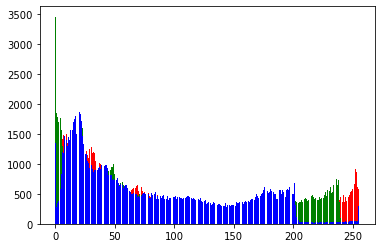

In [26]:
pl = im.histogram()
print(type(pl))
print(len(pl))
plt.bar(range(256), pl[:256], color='r')
plt.bar(range(256), pl[256:2*256], color='g')
plt.bar(range(256), pl[2*256:], color='b')
plt.show()

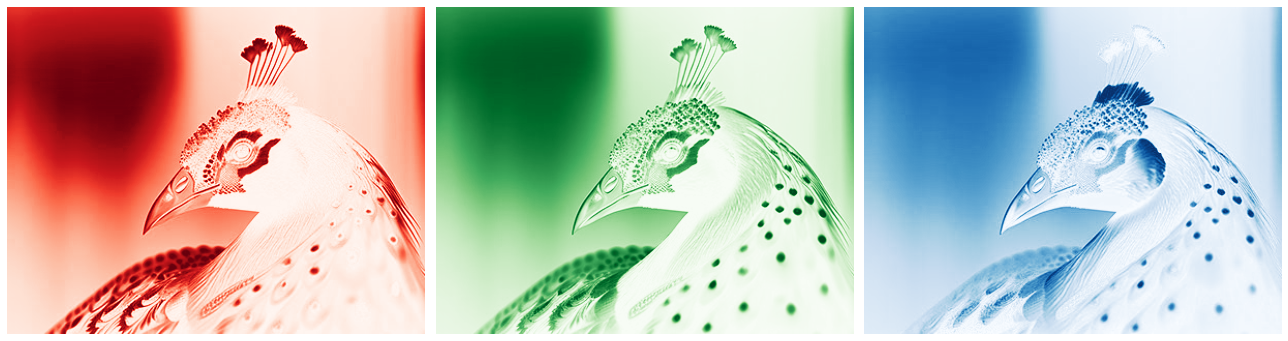

In [27]:
ch_r, ch_g, ch_b = im.split() # split the RGB image into 3 channels: R, G and B

# we shall use matplotlib to display the channels

plt.figure(figsize=(18,6))
plt.subplot(1,3,1); plt.imshow(ch_r, cmap=plt.cm.Reds); plt.axis('off')
plt.subplot(1,3,2); plt.imshow(ch_g, cmap=plt.cm.Greens); plt.axis('off')
plt.subplot(1,3,3); plt.imshow(ch_b, cmap=plt.cm.Blues); plt.axis('off')
plt.tight_layout()
plt.show() # show the R, G, B channels


#### Combining multiple channels of an image

In [28]:
im = Image.merge('RGB', (ch_b, ch_g, ch_r)) # swap the red and blue channels obtained last time with split()
im.save('images/peacock_swapped.jpeg')

#### α-blending two images

The blend() function can be used to create a new image by interpolating two given images
(of the same size) using a constant, α. Both images must have the same size and mode. The
output image is given by the following:
                        out = image1 * (1.0 - α) + image2 * α

In [29]:
im1 = Image.open("images/dog.png")
im2 = Image.open("images/sky.jpg")
print(im1.mode, im2.mode)
print(im1.size, im2.size)
im2 = im2.convert('RGBA') # two images have different modes, must be converted to the same mode
im2 = im2.resize((im1.width, im1.height), Image.BILINEAR) # two images have different sizes, must be converted to the same size
print(im1.size, im2.size)
print(im1.mode, im2.mode)
im = Image.blend(im1, im2, alpha=0.5)
im.show()

RGBA RGB
(320, 476) (3072, 2304)
(320, 476) (320, 476)
RGBA RGBA


#### Superimposing two images

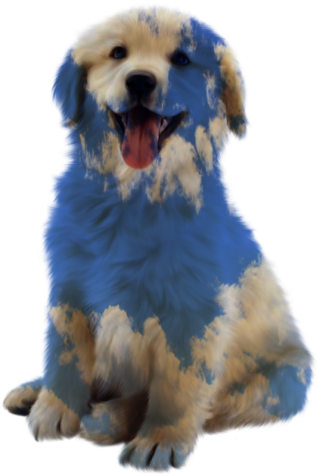

In [30]:
from PIL import ImageChops
ImageChops.multiply(im1, im2)

#### Adding two images

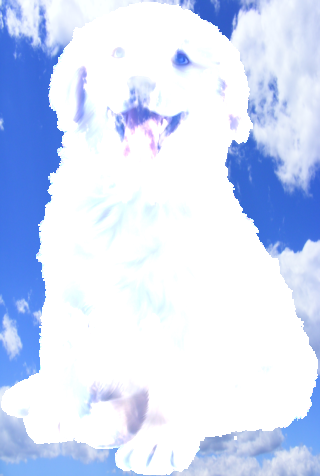

In [31]:
from PIL import ImageChops
ImageChops.add(im1, im2)